In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Questão 3 - Regressão logística

##### Foram utilizadas ambos os datasets separadamente

In [4]:
red = pd.read_csv('winequality-red.csv', sep= ';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
red['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

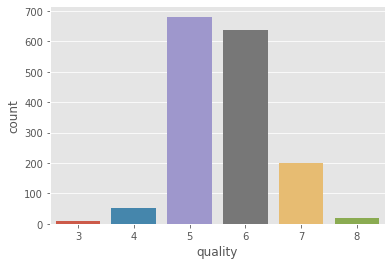

In [9]:
style.use('ggplot')
sns.countplot(red['quality'])

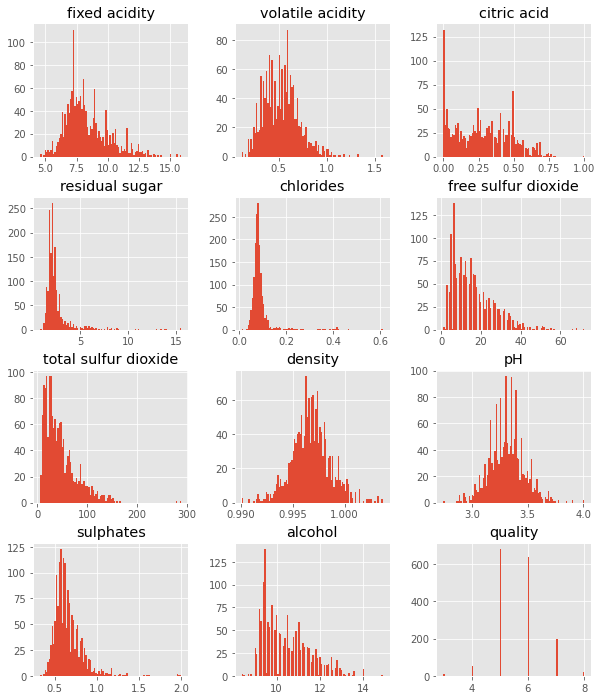

In [8]:
red.hist(bins=100, figsize=(10,12))
plt.show()

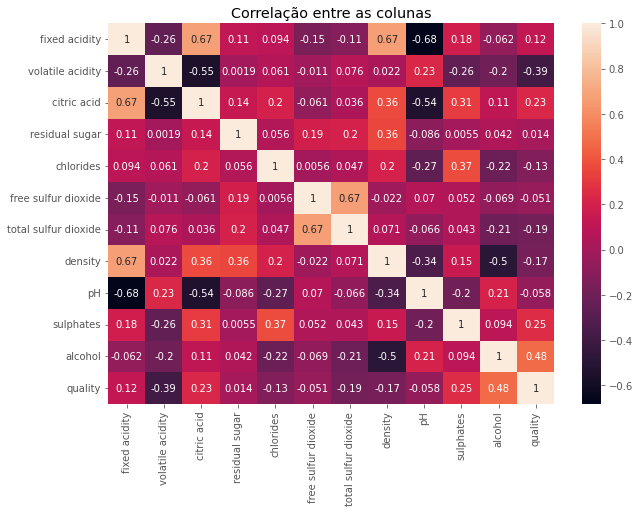

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(red.corr(), annot=True)
plt.title('Correlação entre as colunas')
plt.show()

In [10]:
red.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

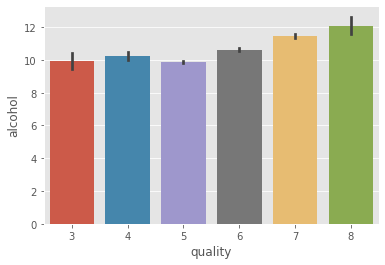

In [11]:
sns.barplot(red['quality'], red['alcohol'])

### Processando os dados

In [12]:
red['quality'] = red.quality.apply(lambda x:1 if x>=6 else 0)

In [13]:
red['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [14]:
X = red.drop('quality', axis=1)
y = red['quality']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [16]:

print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (1119, 11)
y_train  (1119,)
X_test  (480, 11)
y_test  (480,)


### TREINANDO O MODELO - VINHOS VERMELHOS

#### Regressão logística

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("acuracidade do teste é: {:.2f}%".format(logreg_acc*100))

acuracidade do teste é: 73.12%


In [18]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70       213
           1       0.77      0.74      0.75       267

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480



TN:  153
FN:  69
TP:  198
FP:  60


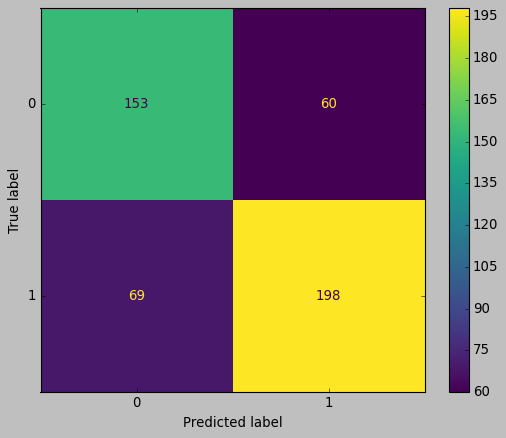

In [20]:
# Matriz de confusão
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=logreg.classes_)
disp.plot()
print("TN: ", cm[0][0]) # verdadeiro negativo
print("FN: ", cm[1][0]) # Falso negativo
print("TP: ", cm[1][1]) # Verdadeiro positivo
print("FP: ", cm[0][1]) # Falso positivo

In [12]:
white = pd.read_csv('winequality-white.csv', sep= ';')
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [28]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [29]:
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [30]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [31]:
white['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

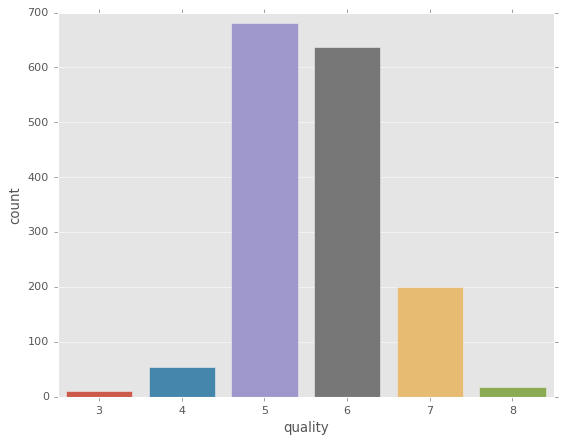

In [32]:
style.use('ggplot')
sns.countplot(red['quality'])

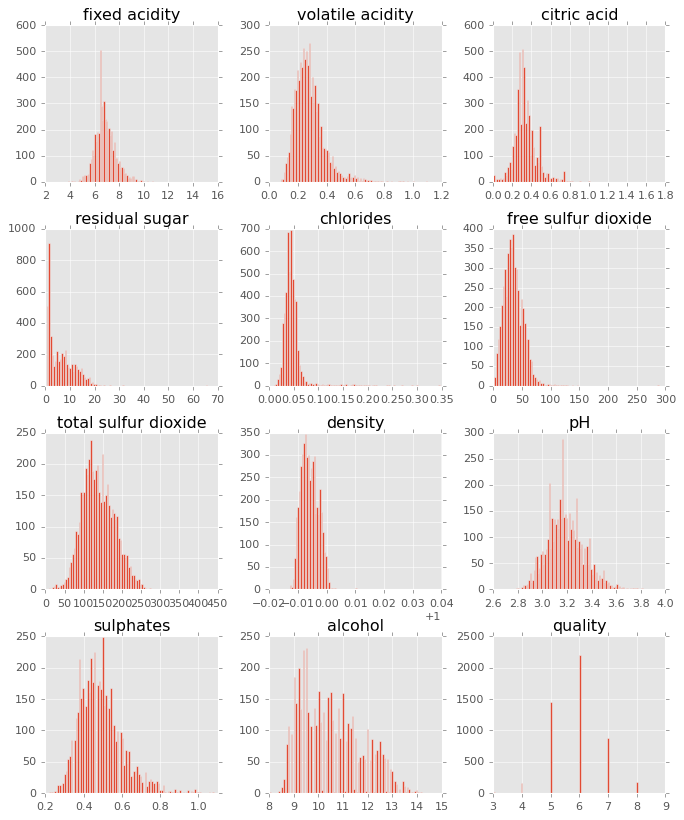

In [33]:
white.hist(bins=100, figsize=(10,12))
plt.show()

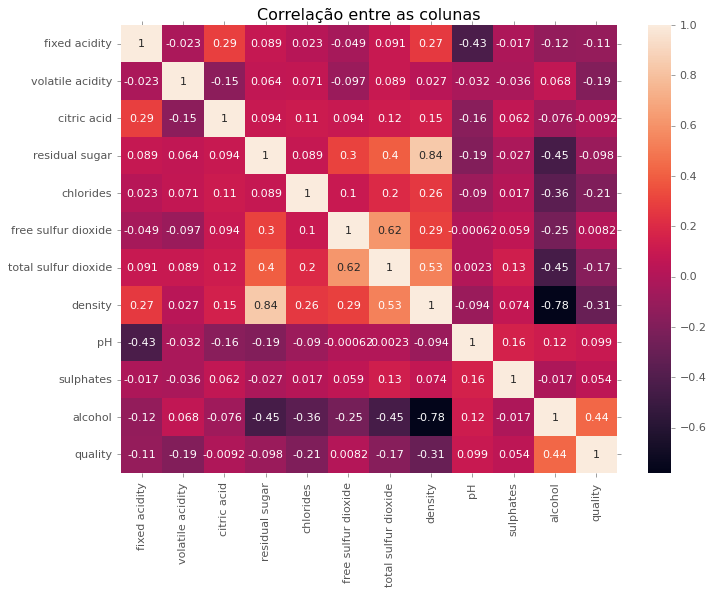

In [35]:
plt.figure(figsize=(10,7))
sns.heatmap(white.corr(), annot=True)
plt.title('Correlação entre as colunas')
plt.show()

In [36]:
white.corr()['quality'].sort_values()

density                -0.307123
chlorides              -0.209934
volatile acidity       -0.194723
total sulfur dioxide   -0.174737
fixed acidity          -0.113663
residual sugar         -0.097577
citric acid            -0.009209
free sulfur dioxide     0.008158
sulphates               0.053678
pH                      0.099427
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

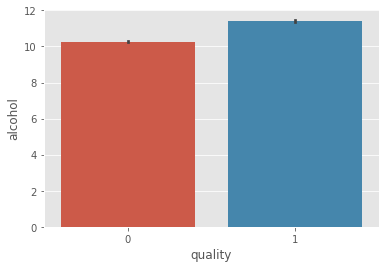

In [20]:
sns.barplot(white['quality'], white['alcohol'])

### Processando os dados

In [38]:
white['quality'] = white.quality.apply(lambda x:1 if x>=6 else 0)

In [39]:
white['quality'].value_counts()

1    3258
0    1640
Name: quality, dtype: int64

In [40]:
X = white.drop('quality', axis=1)
y = white['quality']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [42]:
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (3428, 11)
y_train  (3428,)
X_test  (1470, 11)
y_test  (1470,)


### TREINANDO O MODELO - VINHOS BRANCOS

#### Regressão logística

In [43]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("acuracidade do teste é: {:.2f}%".format(logreg_acc*100))

acuracidade do teste é: 75.17%


In [44]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.66      0.47      0.55       473
           1       0.78      0.88      0.83       997

    accuracy                           0.75      1470
   macro avg       0.72      0.68      0.69      1470
weighted avg       0.74      0.75      0.74      1470



TN:  224
FN:  116
TP:  881
FP:  249


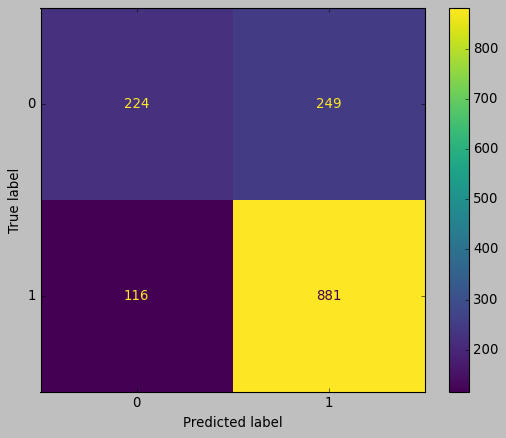

In [45]:
# Matriz de confusão
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=logreg.classes_)
disp.plot()
print("TN: ", cm[0][0]) # verdadeiro negativo
print("FN: ", cm[1][0]) # Falso negativo
print("TP: ", cm[1][1]) # Verdadeiro positivo
print("FP: ", cm[0][1]) # Falso positivo

Após fazer algumas análises, chegamos a conclusão de que o modelo de regressão logística não seria o mais apropriado para este caso, acreditamos que existam outros modelos que atendam melhor. Por exemplo, no nosso caso, observamos que se a gente usar como parâmetro os vinhos acima de 7, em vez de 6, a acurácia do modelo aumenta e chega perto dos 80%. Como demonstrado abaixo:

In [17]:
white = pd.read_csv('winequality-white.csv', sep= ';')
white['quality'] = white.quality.apply(lambda x:1 if x>=7 else 0)
white['quality'].value_counts()

0    3838
1    1060
Name: quality, dtype: int64

In [18]:
X = white.drop('quality', axis=1)
y = white['quality']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (3428, 11)
y_train  (3428,)
X_test  (1470, 11)
y_test  (1470,)


In [19]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("acuracidade do teste é: {:.2f}%".format(logreg_acc*100))

acuracidade do teste é: 79.05%
